In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [18]:
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 22})

def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.
    
    Source: https://jwalton.info/Matplotlib-latex-PGF/
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27
    
    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2
    
    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

/var/folders/yc/sg2v7pxx3lx5qvhgy7szdch40000gn/T/ipykernel_57891/1558098839.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Synthetic

In [57]:
with open('/Users/gautam/Desktop/workbench/cs330-final/p0-synth.pkl', 'rb') as f:
    sh, se, _, steps = pickle.load(f)

/var/folders/yc/sg2v7pxx3lx5qvhgy7szdch40000gn/T/ipykernel_57891/3107959341.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


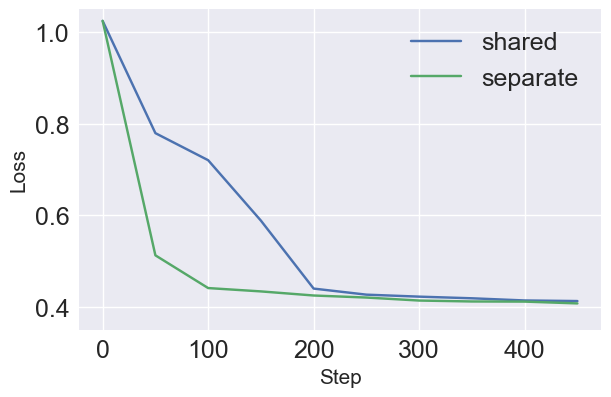

In [73]:
subplots = (1, 1)
width, height = set_size(487, subplots=subplots)
fig, ax = plt.subplots(*subplots, figsize=(width, height))

ax.tick_params(labelsize=18)
ax.plot(steps, sh, label='shared')
ax.plot(steps, se, label='separate')

ax.set_ylim([0.35, 1.05])
ax.set_ylabel('Loss', fontsize=15)
ax.set_xlabel('Step', fontsize=15)
ax.legend(fontsize=18)

fig.savefig('synthetic-p0.png', format='png', bbox_inches='tight')

fig.show()

/var/folders/yc/sg2v7pxx3lx5qvhgy7szdch40000gn/T/ipykernel_57891/3798137402.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


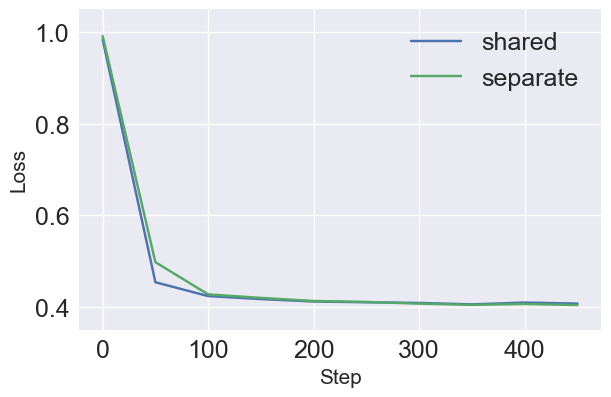

In [77]:
with open('/Users/gautam/Desktop/workbench/cs330-final/p1-synth.pkl', 'rb') as f:
    sh, se, _, steps = pickle.load(f)
    
subplots = (1, 1)
width, height = set_size(487, subplots=subplots)
fig, ax = plt.subplots(*subplots, figsize=(width, height))

ax.tick_params(labelsize=18)
ax.plot(steps, sh, label='shared')
ax.plot(steps, se, label='separate')

ax.set_ylim([0.35, 1.05])
ax.set_ylabel('Loss', fontsize=15)
ax.set_xlabel('Step', fontsize=15)
ax.legend(fontsize=18)

fig.savefig('synthetic-p1.png', format='png', bbox_inches='tight')

fig.show()

/var/folders/yc/sg2v7pxx3lx5qvhgy7szdch40000gn/T/ipykernel_57891/4019192643.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


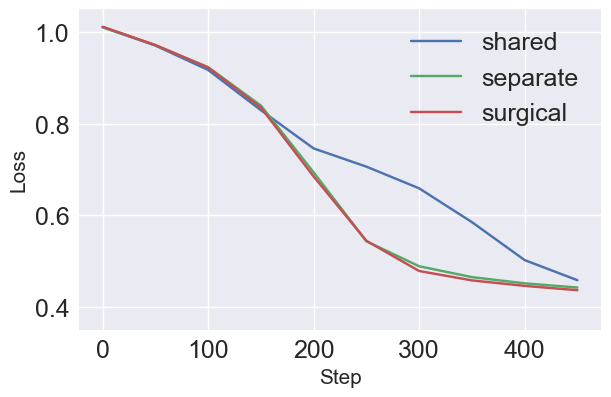

In [214]:
with open('/Users/gautam/Desktop/workbench/cs330-final/p0-synth-sam.pkl', 'rb') as f:
    sh, se, su, steps = pickle.load(f)
    
subplots = (1, 1)
width, height = set_size(487, subplots=subplots)
fig, ax = plt.subplots(*subplots, figsize=(width, height))

ax.tick_params(labelsize=18)
ax.plot(steps, sh, label='shared')
ax.plot(steps, se, label='separate')
ax.plot(steps, su, label='surgical')

ax.set_ylim([0.35, 1.05])
ax.set_ylabel('Loss', fontsize=15)
ax.set_xlabel('Step', fontsize=15)
ax.legend(fontsize=18)

fig.savefig('synthetic-p0-sam.png', format='png', bbox_inches='tight')

fig.show()

/var/folders/yc/sg2v7pxx3lx5qvhgy7szdch40000gn/T/ipykernel_57891/4023440147.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


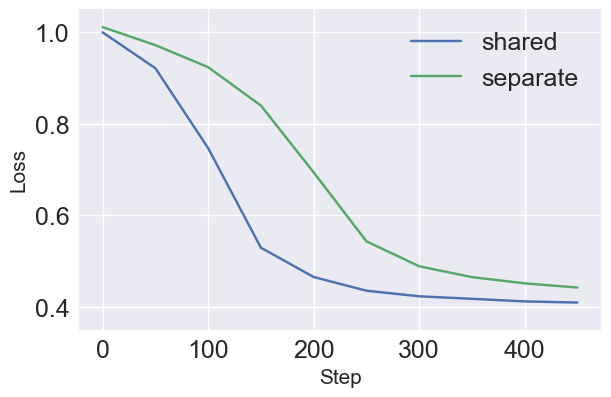

In [213]:
with open('/Users/gautam/Desktop/workbench/cs330-final/p1-synth-sam.pkl', 'rb') as f:
    sh, se, _, steps = pickle.load(f)
    
subplots = (1, 1)
width, height = set_size(487, subplots=subplots)
fig, ax = plt.subplots(*subplots, figsize=(width, height))

ax.tick_params(labelsize=18)
ax.plot(steps, sh, label='shared')
ax.plot(steps, se, label='separate')
# ax.plot(steps, sh, label='surgical')

ax.set_ylim([0.35, 1.05])
ax.set_ylabel('Loss', fontsize=15)
ax.set_xlabel('Step', fontsize=15)
ax.legend(fontsize=18)

fig.savefig('synthetic-p1-sam.png', format='png', bbox_inches='tight')

fig.show()

### CIFAR-10

In [78]:
cd ~/Desktop/experiment-cifar10

/Users/gautam/Desktop/experiment-cifar10


In [125]:
def cifar_graph(exp_name, n_steps=1500):
    tasks = ['t0', 't1']
    schemes = ['shared', 'separate', 'surgical ($\gamma ']
    metrics = ['loss', 'acc']

    steps = range(0, n_steps, 50)
    
    subplots = (1, 2)
    width, height = set_size(487, subplots=subplots)
    fig, axes = plt.subplots(*subplots, figsize=(width * 2, height * 2))

    axes[0].tick_params(labelsize=18)
    axes[1].tick_params(labelsize=18)

    for s in schemes:
        for a, m in zip(range(2), metrics):
            avg_task_values = []
            for t in tasks:
                with open(f'{exp_name}/{t}{s}{m}.txt') as f:
                    values = [float(v.strip()) for v in f.readlines()]
                avg_task_values.append(values)

            avg_task_values = np.array(avg_task_values)
            axes[a].plot(steps, avg_task_values.mean(axis=0), label=f'{s}')

    axes[0].set_ylabel('Loss', fontsize=15)
    axes[0].set_xlabel('Step', fontsize=15)
    axes[0].legend(fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=15)
    axes[1].set_xlabel('Step', fontsize=15)
    axes[1].legend(fontsize=18)
    return fig

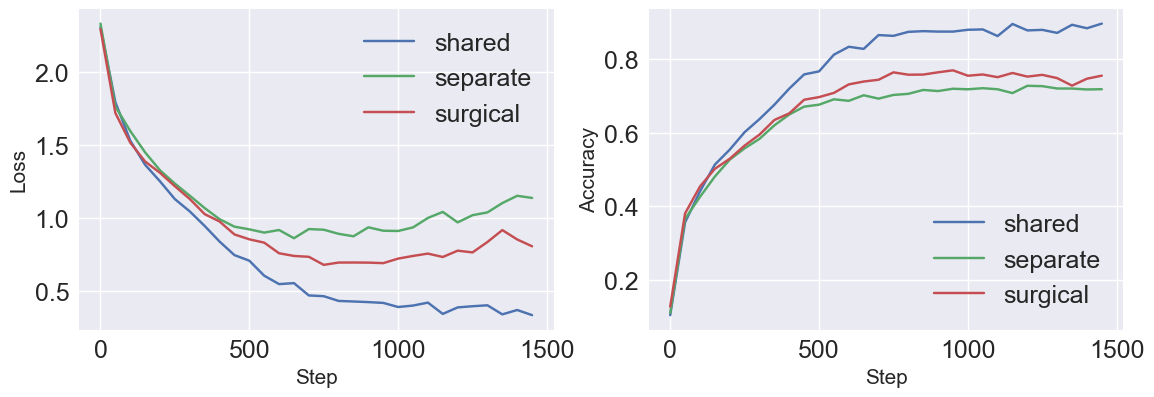

In [126]:
fig = cifar_graph('cifar10_mixer_12', n_steps=1500)
fig.savefig('cifar10_mixer_12.png', format='png', bbox_inches='tight')

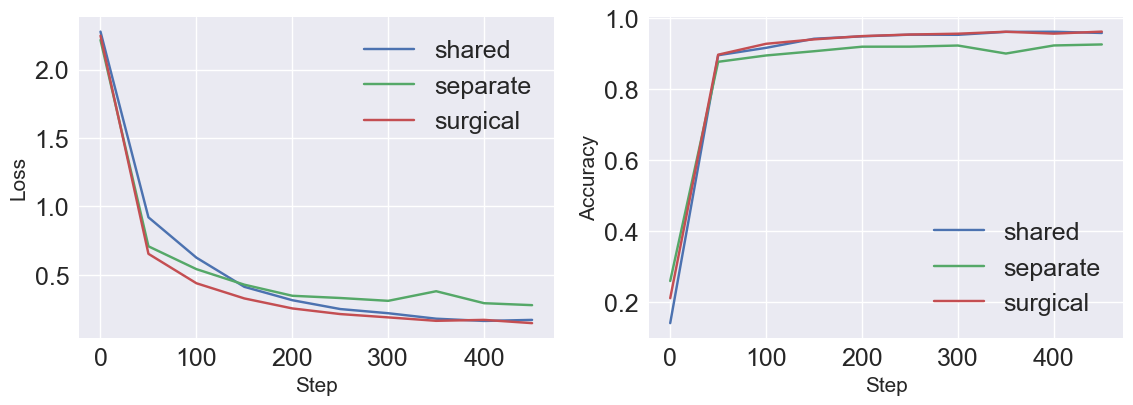

In [127]:
fig = cifar_graph('cifar10_resnet18_pretrained', n_steps=500)
fig.savefig('cifar10_resnet18_pretrained.png', format='png', bbox_inches='tight')

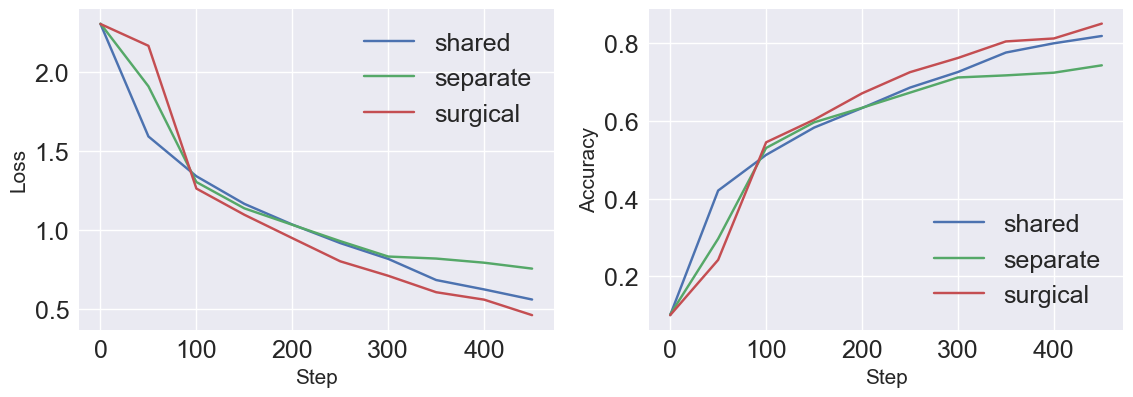

In [128]:
fig = cifar_graph('cifar10_resnet18_random', n_steps=500)
fig.savefig('cifar10_resnet18_random.png', format='png', bbox_inches='tight')

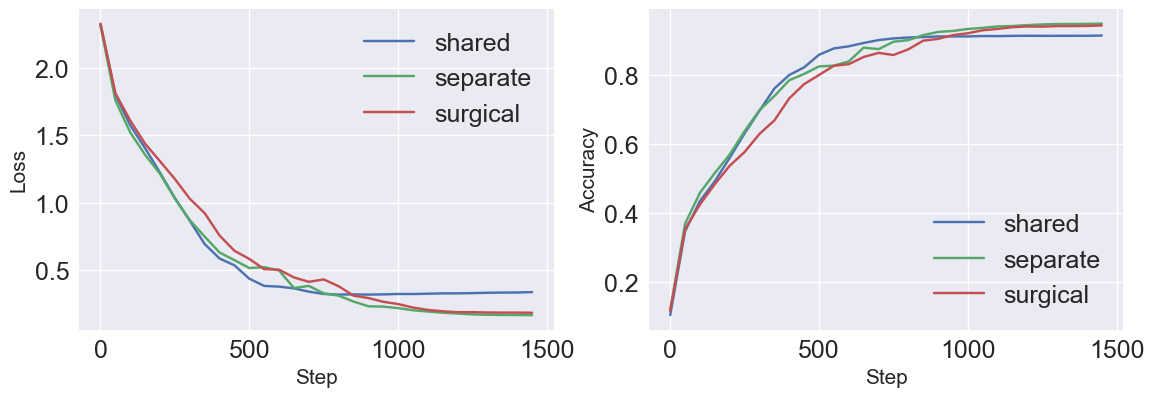

In [130]:
fig = cifar_graph('cifar10c_mixer_12', n_steps=1500)
fig.savefig('cifar10c_mixer_12.png', format='png', bbox_inches='tight')

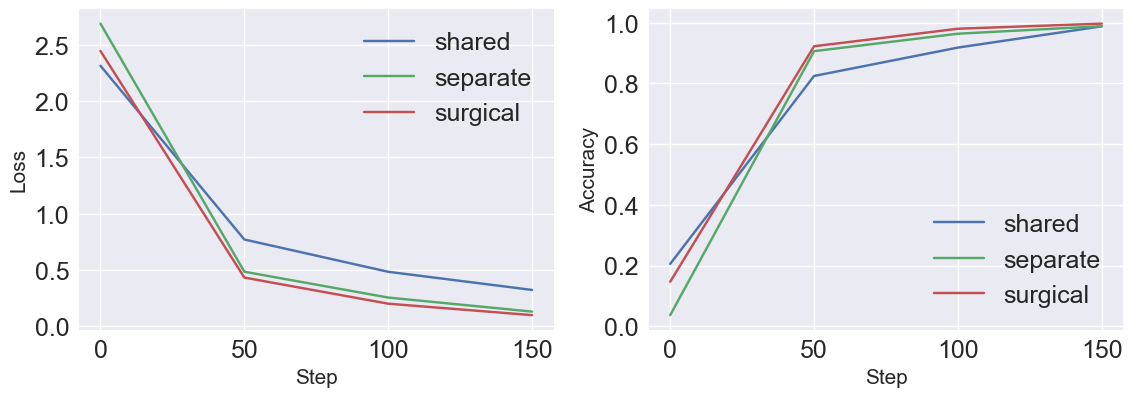

In [133]:
fig = cifar_graph('cifar10c_resnet18_pretrained', n_steps=200)
fig.savefig('cifar10c_resnet18_pretrained.png', format='png', bbox_inches='tight')

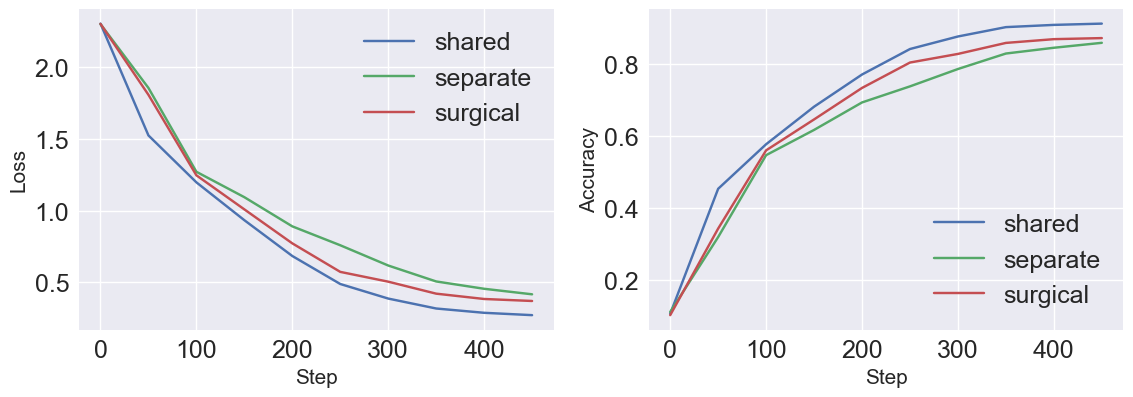

In [135]:
fig = cifar_graph('cifar10c_resnet18_random', n_steps=500)
fig.savefig('cifar10c_resnet18_random.png', format='png', bbox_inches='tight')

### GLUE

In [290]:
cd ~/Desktop/experiment-bert/plots

/Users/gautam/Desktop/experiment-bert/plots


In [291]:
sizes = ['mini', 'tiny', 'small', 'medium']


def glue_graph(size, n_steps=500):
    tasks = ['mrpc', 'sst2']
    schemes = ['shared', 'separate', 'surgical']

    steps = list(range(0, n_steps, 50))
    
    subplots = (1, 1)
    width, height = set_size(487, subplots=subplots)
    fig, axes = plt.subplots(*subplots, figsize=(width, height))

    axes.tick_params(labelsize=18)
    # axes[1].tick_params(labelsize=18)
    
    for s in schemes:
        avg_loss = []
        avg_acc = []
        for t in tasks:
            with open(f'{size}-{s}.pickle', 'rb') as f:
                _, _, val_loss, val_acc = pickle.load(f)
                _, loss = zip(*val_loss)
                _, acc = zip(*val_acc)
                avg_loss.append([l[t] for l in loss])
                avg_acc.append([a[t] for a in acc])
        avg_loss = np.array(avg_loss)
        avg_acc = np.array(avg_acc)
        axes.plot(steps, avg_acc.mean(axis=0), label=s)
    
    axes.set_ylabel('Accuracy', fontsize=15)
    axes.set_xlabel('Step', fontsize=15)
    axes.legend(fontsize=18)
    axes.set_ylim([0.5, 0.82])
    
    return fig

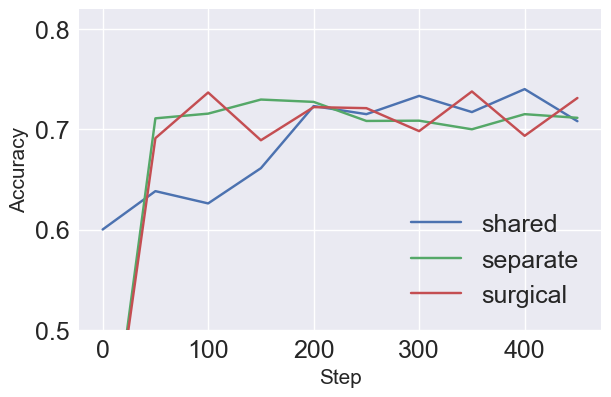

In [292]:
fig = glue_graph('mini', n_steps=500)
fig.savefig('bert-mini.png', format='png', bbox_inches='tight')

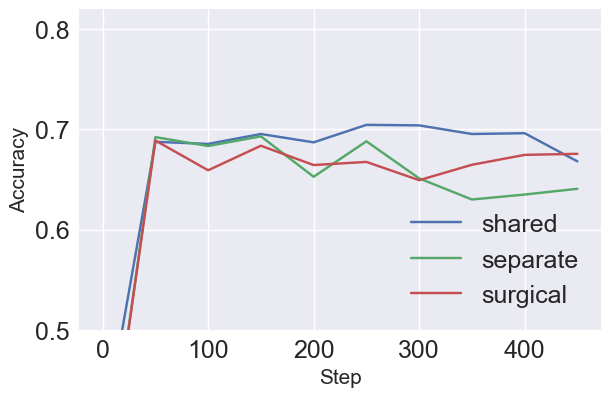

In [293]:
fig = glue_graph('tiny', n_steps=500)
fig.savefig('bert-tiny.png', format='png', bbox_inches='tight')

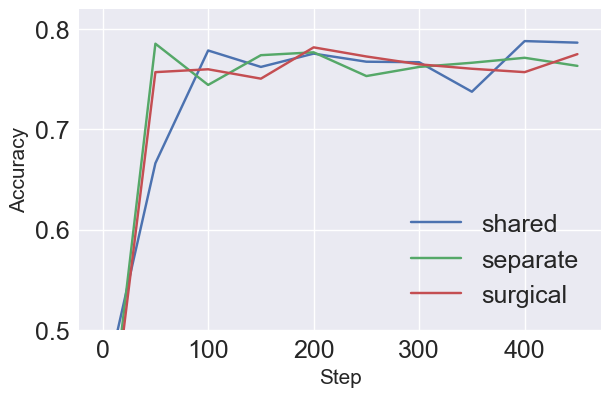

In [294]:
fig = glue_graph('small', n_steps=500)
fig.savefig('bert-small.png', format='png', bbox_inches='tight')

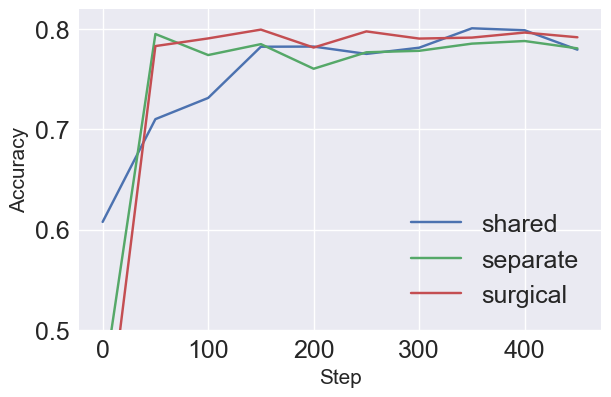

In [295]:
fig = glue_graph('medium', n_steps=500)
fig.savefig('bert-medium.png', format='png', bbox_inches='tight')

In [279]:
def generate_splitting_viz(size):
    with open(f'{size}-gradCosine.pickle', 'rb') as f:
        h, layers = pickle.load(f)

    subplots = (1, 1)
    width, height = set_size(487, subplots=subplots)
    fig, ax = plt.subplots(*subplots, figsize=(width, height))

    ax.tick_params(labelsize=18)
    v = h.mean(0)
    v1 = np.where(v >= 0, v, 0)
    v2 = np.where(v < 0, v, 0)
    ax.bar(range(len(layers)), v1, color='teal')
    ax.bar(range(len(layers)), v2, color='red')


    # ax.set_ylim([0.35, 1.05])
    ax.set_ylabel('Heuristic value', fontsize=15)
    ax.set_xlabel('Layer', fontsize=15)
    ax.legend(fontsize=18)
    return fig

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


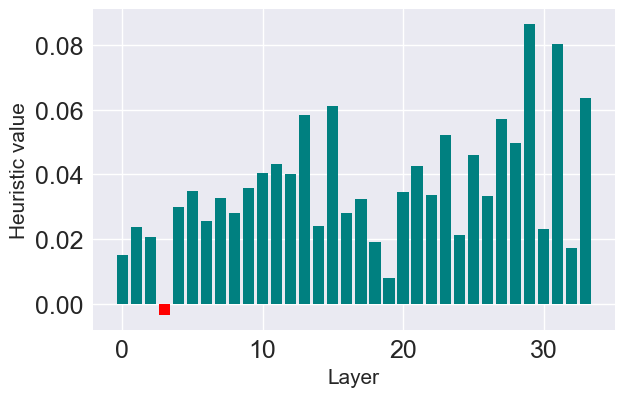

In [296]:
fig = generate_splitting_viz('tiny')
fig.savefig('bert-tiny-splits.png', format='png', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


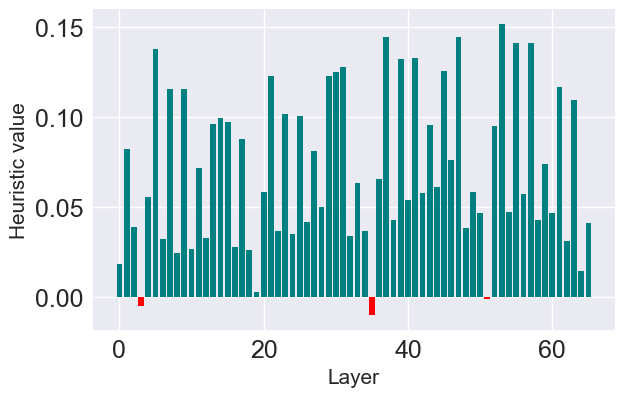

In [297]:
fig = generate_splitting_viz('mini')
fig.savefig('bert-mini-splits.png', format='png', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


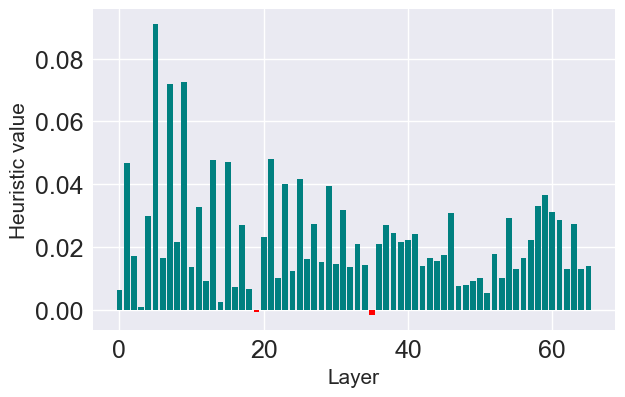

In [298]:
fig = generate_splitting_viz('small')
fig.savefig('bert-small-splits.png', format='png', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


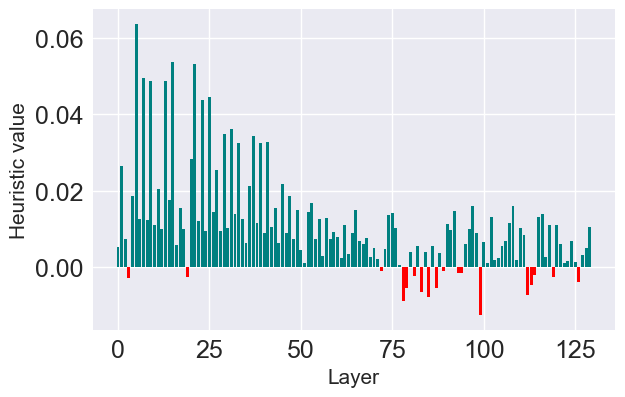

In [299]:
fig = generate_splitting_viz('medium')
fig.savefig('bert-medium-splits.png', format='png', bbox_inches='tight')

### RoBERTA

In [285]:
cd ~/Desktop/experiment-roberta/plots

/Users/gautam/Desktop/experiment-roberta/plots


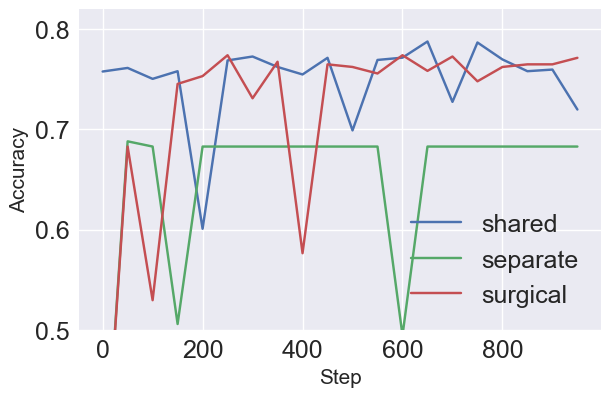

In [286]:
fig = glue_graph('roberta-base', n_steps=1000)
fig.savefig('roberta-base.png', format='png', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


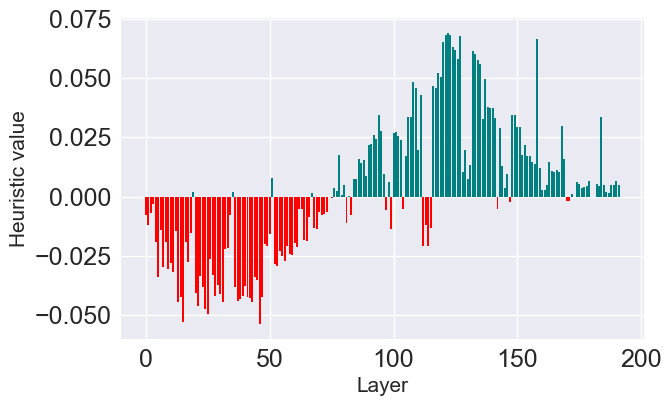

In [288]:
fig = generate_splitting_viz('roberta-base')
fig.savefig('roberta-base-splits.png', format='png', bbox_inches='tight')

### CIFAR-10 Separated Tasks

In [301]:
cd ~/Desktop/experiment-cifar10

/Users/gautam/Desktop/experiment-cifar10


In [313]:
def cifar_graph(exp_name, task, n_steps=1500):
    tasks = {
        't0': 'CIFAR10',
        't1': 'CIFAR10-C',
    }
    
    schemes = ['shared', 'separate', 'surgical']
    metrics = ['loss', 'acc']

    steps = range(0, n_steps, 50)
    
    subplots = (1, 2)
    width, height = set_size(487, subplots=subplots)
    fig, axes = plt.subplots(*subplots, figsize=(width * 2, height * 2))

    axes[0].tick_params(labelsize=18)
    axes[1].tick_params(labelsize=18)

    for s in schemes:
        for a, m in zip(range(2), metrics):
            with open(f'{exp_name}/{task}{s}{m}.txt') as f:
                values = [float(v.strip()) for v in f.readlines()]
            
            axes[a].plot(steps, values, label=f'{s}')

    axes[0].set_ylabel('Loss', fontsize=15)
    axes[0].set_xlabel('Step', fontsize=15)
    axes[0].legend(fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=15)
    axes[1].set_xlabel('Step', fontsize=15)
    axes[1].legend(fontsize=18)
    return fig

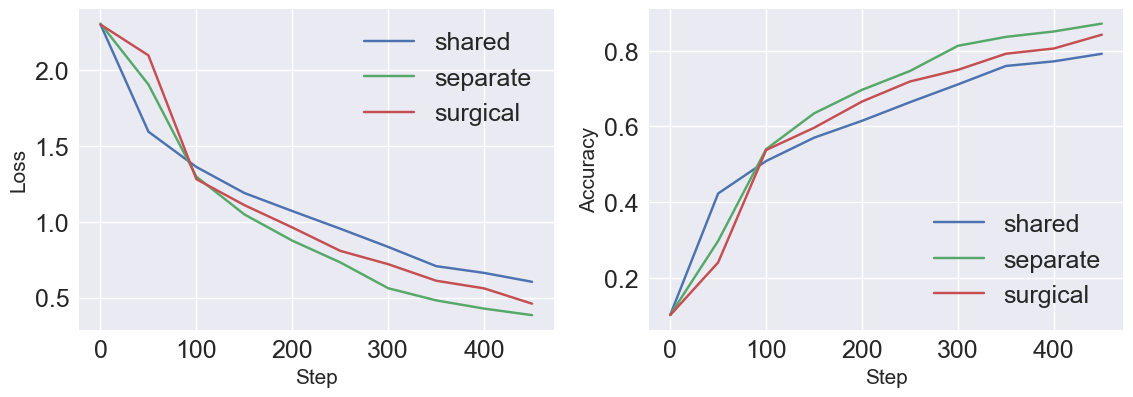

In [325]:
fig = cifar_graph('cifar10_resnet18_random', 't1', n_steps=500)